# **<u>ATM</u>**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import simpy
import random

plt.style.use('dark_background')

# Timeout Event

In [19]:
env = simpy.Environment()

def customer(env):
  yield env.timeout(30)
  print(f'Details entered at time: {env.now}')
  yield env.timeout(60)
  print(f'Cash retrieved at time: {env.now}')

env.process(customer(env=env))

<Process(customer) object at 0x11f376600>

In [20]:
env.run()

Details entered at time: 30
Cash retrieved at time: 90


---
# Multiple Customers
## Constant Interarrival

In [21]:
CUST_INTER_ARR_TIME = 2*60 # 2 Mins

env = simpy.Environment()

def customer(env, name):
  print(f'{name}: Arrives at time {env.now}')
  yield env.timeout(30)
  print(f'{name}: Details entered at time: {env.now}')
  yield env.timeout(60)
  print(f'{name}: Cash retrieved at time: {env.now}')

def customer_generator(env, cust_inter_arr_time):
  cust_number = 1
  while True:
    yield env.timeout(cust_inter_arr_time)
    env.process(customer(env=env, name=f'customer {cust_number}'))
    cust_number+=1

env.process(customer_generator(env=env, cust_inter_arr_time=CUST_INTER_ARR_TIME))

<Process(customer_generator) object at 0x11f36f950>

In [22]:
env.run(until=10*60) # 10 Mins

customer 1: Arrives at time 120
customer 1: Details entered at time: 150
customer 1: Cash retrieved at time: 210
customer 2: Arrives at time 240
customer 2: Details entered at time: 270
customer 2: Cash retrieved at time: 330
customer 3: Arrives at time 360
customer 3: Details entered at time: 390
customer 3: Cash retrieved at time: 450
customer 4: Arrives at time 480
customer 4: Details entered at time: 510
customer 4: Cash retrieved at time: 570


---
## Random Customer Arrival Times

In [23]:
def customer(env, name):
  print(f'{name}: Arrives at time {env.now:.2f}')
  yield env.timeout(30)
  print(f'{name}: Details entered at time: {env.now:.2f}')
  yield env.timeout(60)
  print(f'{name}: Cash retrieved at time: {env.now:.2f}')

def customer_generator(env):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1, 3) * 60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f'customer {cust_number}'))
    cust_number+=1

env = simpy.Environment()

env.process(customer_generator(env=env))

<Process(customer_generator) object at 0x11f4330e0>

In [24]:
env.run(until=10*60) # 10 Mins

customer 1: Arrives at time 82.31
customer 1: Details entered at time: 112.31
customer 1: Cash retrieved at time: 172.31
customer 2: Arrives at time 195.77
customer 2: Details entered at time: 225.77
customer 2: Cash retrieved at time: 285.77
customer 3: Arrives at time 332.09
customer 3: Details entered at time: 362.09
customer 3: Cash retrieved at time: 422.09
customer 4: Arrives at time 423.03
customer 4: Details entered at time: 453.03
customer 4: Cash retrieved at time: 513.03
customer 5: Arrives at time 570.20


---
## Resource (method 1)

In [25]:
def customer(env, name, atm):
  print(f'{name}: Arrives at time {env.now:.2f}')
  atm_req = atm.request()

  yield atm_req
  print(f'{name}: gets ATM machine at time {env.now:.2f}')

  yield env.timeout(30)
  print(f'{name}: Details entered at time: {env.now:.2f}')
  yield env.timeout(60)
  print(f'{name}: Cash retrieved at time: {env.now:.2f}')
  atm.release(atm_req)

def customer_generator(env, atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1, 3) * 60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    cust_number+=1

env = simpy.Environment()

atm = simpy.Resource(env=env, capacity=1)
env.process(customer_generator(env=env, atm=atm))

<Process(customer_generator) object at 0x11f36dca0>

In [26]:
env.run(until=10*60) # 10 Mins

customer 1: Arrives at time 140.31
customer 1: gets ATM machine at time 140.31
customer 1: Details entered at time: 170.31
customer 1: Cash retrieved at time: 230.31
customer 2: Arrives at time 262.62
customer 2: gets ATM machine at time 262.62
customer 2: Details entered at time: 292.62
customer 2: Cash retrieved at time: 352.62
customer 3: Arrives at time 402.50
customer 3: gets ATM machine at time 402.50
customer 3: Details entered at time: 432.50
customer 3: Cash retrieved at time: 492.50
customer 4: Arrives at time 530.42
customer 4: gets ATM machine at time 530.42
customer 4: Details entered at time: 560.42


---
## Resource (method 2)

In [27]:
def customer(env, name, atm):
  print(f'{name}: Arrives at time {env.now:.2f}')
  with atm.request() as atm_req:
    yield atm_req
    print(f'{name}: gets ATM machine at time {env.now:.2f}')

    yield env.timeout(30)
    print(f'{name}: Details entered at time: {env.now:.2f}')
    yield env.timeout(60)
    print(f'{name}: Cash retrieved at time: {env.now:.2f}')

def customer_generator(env, atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1, 3) * 60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    cust_number+=1

env = simpy.Environment()

atm = simpy.Resource(env=env, capacity=1)
env.process(customer_generator(env=env, atm=atm))

<Process(customer_generator) object at 0x11f417fe0>

In [28]:
env.run(until=10*60) # 10 Mins

customer 1: Arrives at time 84.47
customer 1: gets ATM machine at time 84.47
customer 1: Details entered at time: 114.47
customer 1: Cash retrieved at time: 174.47
customer 2: Arrives at time 184.73
customer 2: gets ATM machine at time 184.73
customer 2: Details entered at time: 214.73
customer 3: Arrives at time 249.21
customer 2: Cash retrieved at time: 274.73
customer 3: gets ATM machine at time 274.73
customer 3: Details entered at time: 304.73
customer 3: Cash retrieved at time: 364.73
customer 4: Arrives at time 416.24
customer 4: gets ATM machine at time 416.24
customer 4: Details entered at time: 446.24
customer 4: Cash retrieved at time: 506.24
customer 5: Arrives at time 593.31
customer 5: gets ATM machine at time 593.31


---
# Business Case Study

Make use of KPIs to determine how many ATMs are needed:
- Throughput time
- Cycle time
- Waiting time 

In [29]:
SIM_TIME = 24*60*60
WARMUP_TIME = 1*60

cycle_time_simulation = []
cycle_time_replication = []
waiting_time_simulation = []
waiting_time_replication = []
throughput_simulation = []

def customer(env, name, atm):
  customer_enter_time = env.now
  # print(f'{name}: Arrives at time {env.now:2f}')
  with atm.request() as atm_req:
    yield atm_req
    # print(f'{name}: gets ATM machine at time {env.now:2f}')
    customer_got_atm = env.now

    yield env.timeout(30)
    # print(f'{name}: Details entered at time: {env.now:2f}')
    yield env.timeout(60)
    # print(f'{name}: Cash retrieved at time: {env.now:2f}')
  if env.now > WARMUP_TIME:
    waiting_time_replication.append(customer_got_atm - customer_enter_time)
    cycle_time_replication.append(env.now - customer_enter_time)

def customer_generator(env, atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1, 3) * 60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    cust_number+=1

for r in range(50):
    env = simpy.Environment()

    atm = simpy.Resource(env=env, capacity=1)

    env.process(customer_generator(env=env, atm=atm))

    env.run(until=SIM_TIME) # 24 Hours

    cycle_time_simulation.append(np.mean(cycle_time_replication))
    waiting_time_simulation.append(np.mean(waiting_time_replication))

    num_customers = len(cycle_time_replication)
    throughput_simulation.append(num_customers/(SIM_TIME - WARMUP_TIME))

    cycle_time_replication = []
    waiting_time_replication = []

print(f'Average Cycle Time: {np.mean(cycle_time_simulation)/60 :.2f} minutes +/- {np.std(cycle_time_simulation)/60 :.2f} minutes')
print(f'Average Waiting Time: {np.mean(waiting_time_simulation)/60 :.2f} minutes +/- {np.std(waiting_time_simulation)/60 :.2f} minutes')
print(f'Average Throughput Rate:  {np.mean(throughput_simulation)*60*60 :.2f} customers per hour +/- {np.std(throughput_simulation)*60*60 :.2f} customers/hour')

Average Cycle Time: 1.60 minutes +/- 0.01 minutes
Average Waiting Time: 0.10 minutes +/- 0.01 minutes
Average Throughput Rate:  29.95 customers per hour +/- 0.32 customers/hour


## How many ATMs should the bank install?

In [30]:
SIM_TIME = 24*60*60
WARMUP_TIME = 1*60

cycle_time_simulation = []
cycle_time_replication = []
waiting_time_simulation = []
waiting_time_replication = []
throughput_simulation = []

num_atms = [1,2,3,4,5,6]
cycle_time_atm = []
throughput_atm = []

def customer(env, name, atm):
  customer_enter_time = env.now
  # print(f'{name}: Arrives at time {env.now:2f}')
  with atm.request() as atm_req:
    yield atm_req
    # print(f'{name}: gets ATM machine at time {env.now:2f}')
    customer_got_atm = env.now

    yield env.timeout(30)
    # print(f'{name}: Details entered at time: {env.now:2f}')
    yield env.timeout(60)
    # print(f'{name}: Cash retrieved at time: {env.now:2f}')
  if env.now > WARMUP_TIME:
    waiting_time_replication.append(customer_got_atm - customer_enter_time)
    cycle_time_replication.append(env.now - customer_enter_time)

def customer_generator(env, atm):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.uniform(1, 3) * 60
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f'customer {cust_number}', atm=atm))
    cust_number+=1

for atm_cap in num_atms:
    for r in range(50):
        env = simpy.Environment()

        atm = simpy.Resource(env=env, capacity=atm_cap)

        env.process(customer_generator(env=env, atm=atm))

        env.run(until=SIM_TIME) # 24 Hours

        cycle_time_simulation.append(np.mean(cycle_time_replication))
        waiting_time_simulation.append(np.mean(waiting_time_replication))

        num_customers = len(cycle_time_replication)
        throughput_simulation.append(num_customers/(SIM_TIME - WARMUP_TIME))

        cycle_time_replication = []
        waiting_time_replication = []
    
    # Collect data per ATM
    cycle_time_atm.append(np.mean(cycle_time_simulation)/60)
    throughput_atm.append(np.mean(throughput_simulation)*60*60)
    cycle_time_simulation = []
    throughput_simulation = []

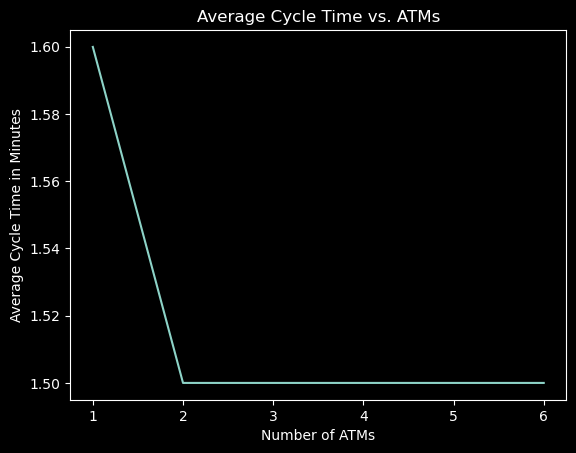

In [31]:
plt.plot(num_atms, cycle_time_atm)
plt.title('Average Cycle Time vs. ATMs')
plt.xlabel('Number of ATMs')
plt.ylabel('Average Cycle Time in Minutes')
plt.show()

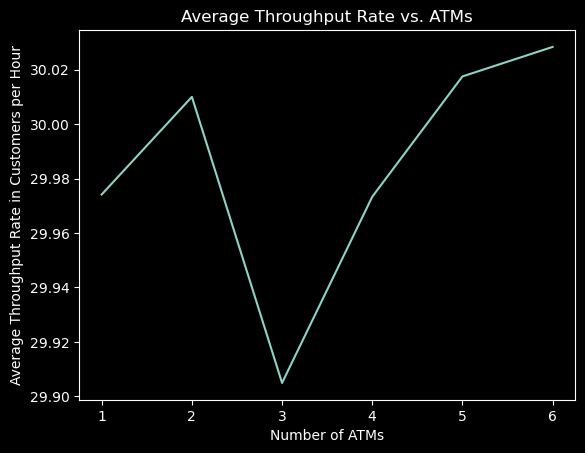

In [33]:
plt.plot(num_atms, throughput_atm)
plt.title('Average Throughput Rate vs. ATMs')
plt.xlabel('Number of ATMs')
plt.ylabel('Average Throughput Rate in Customers per Hour')
plt.show()